<a href="https://colab.research.google.com/github/bel3170/Stroke-prediction-model/blob/main/Stroke_prediciton_model_training%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

Nama : Roenrico Jobel

ID    : SI612001

Mentor Name : M Riziq Maulana


In [ ]:
# mengimport library yang diperlukan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split


In [ ]:
# mengupload csv dari local drive
from google.colab import files
upload = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
# mengganti nama file csv agar lebih mudah di panggil
os.rename('healthcare-dataset-stroke-data.csv', 'data.csv')

In [ ]:
# membuat data frame yang akan digunakan pada tugas kali ini
df = pd.read_csv('data.csv')

# melihat informasi data secara singkat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# untuk mengetahui berapa banyak data yang memiliki niali Null atau NaN
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Melihat persebarana data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# mengdrop atau membuang row yang memiliki nilai Null atau Nan
# Karena jumlah data yang null tidak lebih dari 5% data yang ada maka dari itu
# tidak terlalu banyak data yang terbuang walau di drop
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
# mendrop kolom id karena tidak akan digunakan untuk perhitungan
df.drop(columns=['id'], axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# melihat unique value yang ada pada data
object_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique().tolist() for col in object_columns}

unique_values

{'gender': ['Male', 'Female', 'Other'],
 'ever_married': ['Yes', 'No'],
 'work_type': ['Private',
  'Self-employed',
  'Govt_job',
  'children',
  'Never_worked'],
 'Residence_type': ['Urban', 'Rural'],
 'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']}

In [ ]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [ ]:
# mendrop value other pada kolom gender karena tidak sesuai atau bisa merusak
# prediksi (ini menurut saya)

value_to_drop = 'Other'
df.drop(df[df['gender'] == value_to_drop].index, inplace=True)
df['gender'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [ ]:
# mengubah data menjadi yang bertipe objek menjadi numerik agar bisa digunakna

def ganti(df, c_var):
  for i in c_var:
    unique_values = df[i].unique()
    df[i].replace(unique_values, [0, 1], inplace=True)

  for i in ['work_type']:
    unique_values = df[i].unique()
    df[i].replace(unique_values, [0, 1, 2, 3, 4], inplace=True)

  for i in ['smoking_status']:
    unique_values = df[i].unique()
    df[i].replace(unique_values, [0, 1, 2, 3], inplace=True)

In [ ]:
c_var = ['gender', 'ever_married', 'Residence_type']

ganti(df, c_var)

In [ ]:
df.smoking_status.value_counts()

smoking_status
1    1852
3    1483
0     836
2     737
Name: count, dtype: int64

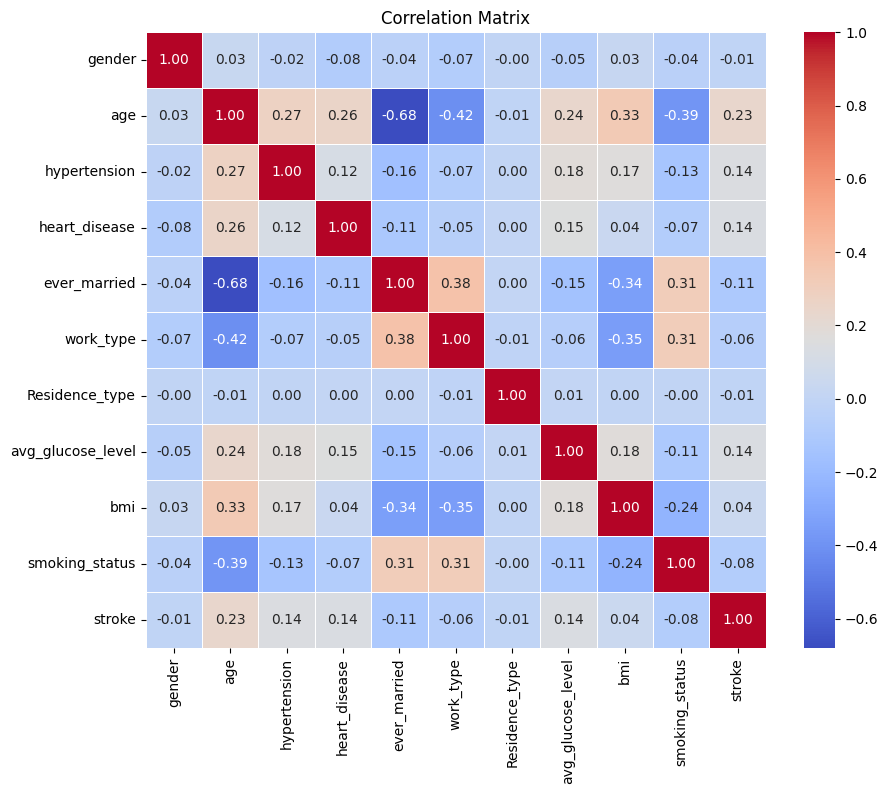

In [ ]:
#melihat korelasi kolom pada data
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# membuang kolom stroke karena merupakan target
# y menjadi fitur yang digunakna dan x adalah target dari prediksi

X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0
2,0,80.0,0,1,0,0,1,105.92,32.5,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2
4,1,79.0,1,0,0,1,1,174.12,24.0,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,1,3,1,103.08,18.6,3
5106,1,81.0,0,0,0,1,0,125.20,40.0,1
5107,1,35.0,0,0,0,1,1,82.99,30.6,1
5108,0,51.0,0,0,0,0,1,166.29,25.6,0


In [ ]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4908, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# mengsplit data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# membuat model yang akan digunakna

models = {'Decision Tree' : DecisionTreeClassifier(),
          'Random Forest' : RandomForestClassifier()
          }

results = {}
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    results[name] = {'Accuracy': accuracy, 'Predictions': y_pred}


Training Decision Tree...
Decision Tree Accuracy: 0.9093686354378818
Training Random Forest...
Random Forest Accuracy: 0.9460285132382892


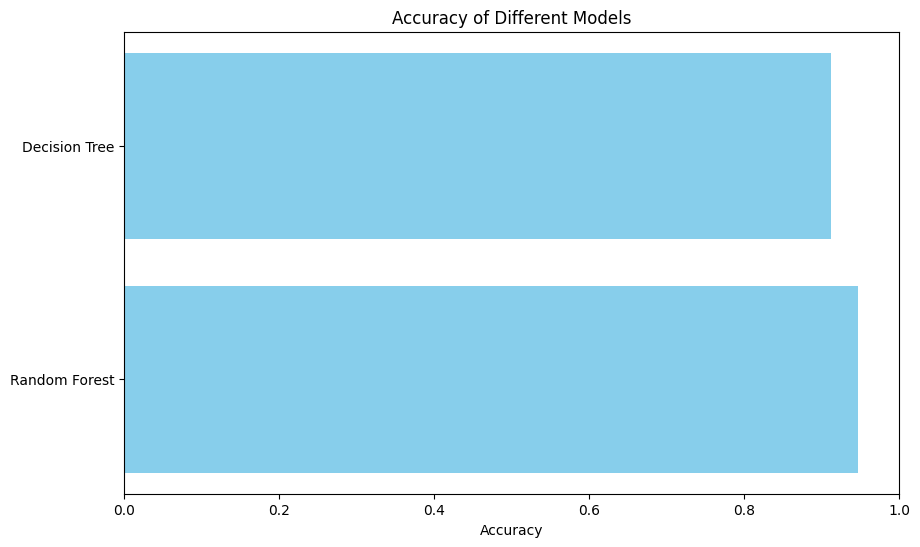

In [ ]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# melakukan hyperparameter tunning

param_grid = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split':[2,5,10]
    },
    'Random Forest': {
      'n_estimators': [25, 50, 100, 150],
      'max_features': ['sqrt', 'log2', None],
      'max_depth': [3, 6, 9],
      'max_leaf_nodes': [3, 6, 9],
    }
}

best_models = {}
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate best models
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Predictions': y_pred}

Tuning hyperparameters for Decision Tree...
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Best cross-validation accuracy: 0.940905982074845
Tuning hyperparameters for Random Forest...
Best parameters found: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 25}
Best cross-validation accuracy: 0.9602651496734251


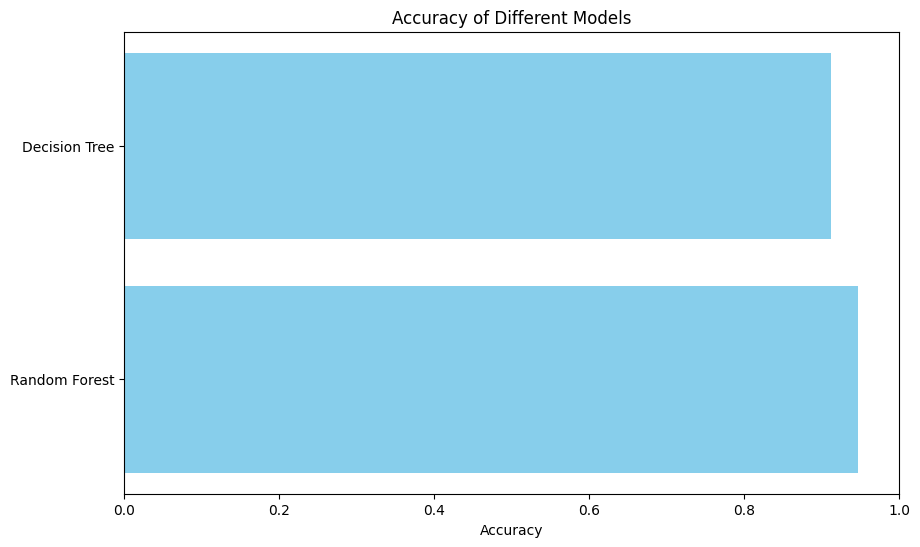

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

Dari persamaan kedua model bisa kita dapatkan bahwa pada case menebak stroke atau tidak model Random Forest lebih unggul sedikit dari pada Decision Tree walaupun sudah di tuning kembali model yang ada.

Ini terjadi karena beberapa alasan misal

1. ensemble learning
2. mengurangi overfitting
3. feature randomness
